PROYECTO INDIVIDUAL N°3
DATA ANALYTIC
GARCIA RESSIA JUAN IGNACIO

ROLL A DESARROLLAR
Nuestra PM se dirigió a nosotros con un nuevo ticket de trabajo. Una startup de tecnología está interesada en sumarse al mercado de cursos online, pero de una manera eficiente, por lo que compró datasets de posibles competidores para analizar y sacar conclusiones de los datos recolectados.

Ellos solicitan segmentar los el nivel de ventas según precio, idioma, nivel y rating de cada curso para analizar qué tanto influyen dichas variables en la demanda del producto vendido.

Por otra parte se nos solicita un WordCloud de las palabras clave que más se repiten dentro del título. (Se puede añadir otras variables de nuestro interés).

Por último, se nos pide una demo en un rango de tiempo de no más de 10 min donde presentamos las funcionalidades del dashboard y las conclusiones/recomendaciones de nuestra parte.

Con el fin de monitorear la eficacia de los objetivos de la empresa, se le pide establecer al menos 1 KPI producto de su análisis y que el mismo se pueda visualizar en un dashboard.

EMPIEZO EL TRABAJO IMPORTANDO LAS BASES DE DATOS Y HACIENDO UN ANALISIS DE LAS MISMAS PARA SUS POSTERIORES TRANSFORMACIONES 

1er BASE DE DATOS 'COURSERA_REVIEWS.CSV

In [1]:
import pandas as pd #importo la libreria para hacer el data frame 

In [2]:
cursera_resenas=pd.read_csv('coursera_reviews.csv')#EMPIEZO TRABAJANDO CON COURSERA_REVIEWS

In [3]:
cursera_resenas.head(2)#hago un head para ver que contiene

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training


In [4]:
cursera_resenas.info()#veo la informacion del archivo, donde veo que no hay nulos y los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [5]:
cursera_resenas[cursera_resenas.duplicated()]#busco duplicados en el Data Frame

,reviews,reviewers,date_reviews,rating,course_id
31,Solid presentation all the way through. I real...,By Logan D,"Sep 03, 2020",5,google-cbrs-cpi-training
32,Probably the best certification course I've ta...,By Luis M C,"Nov 21, 2019",5,google-cbrs-cpi-training
33,The ProctorU.com system took 2 times the amoun...,By scott w,"Sep 28, 2020",5,google-cbrs-cpi-training
34,Covered all of the required information in an ...,By Ryan H,"Aug 26, 2019",5,google-cbrs-cpi-training
35,"Great course, lectures were straight forward a...",By Samuel D,"Jan 24, 2020",5,google-cbrs-cpi-training
...,...,...,...,...,...
1454706,g,By Brijesh K,"Aug 25, 2020",5,computer-networking
1454707,.,By Vasavi V M,"Jul 02, 2020",5,computer-networking
1454708,.,By Drishti D,"Jun 20, 2020",5,computer-networking
1454709,.,By FAUSTINE F K,"Jun 07, 2020",5,computer-networking


In [6]:
cursera_resenas = cursera_resenas.drop_duplicates(keep=False)#eliino las filas duplicadas ya que son datos que peden confundir
cursera_resenas.shape

(51262, 5)

Conclusion de coursera_reviews.csv:
                                  *El csv provisto constaba de muchos campos duplicados, por lo que procedi a eliminr los mismos ya que son datos que pueden confundir una futura interpretacion.
                                  *La informacion que nos provee este data sets es muy escasa para el analisis que nos solicita el cliete, podemos tomar la columna reviews como copras de los clientes a los diferentes cursos.
                                  *Podemos trabajar con el campo rating provisto, lo que se hara mas adelante en el proceso.


2da BASE DE DATOS COURSERA_COURSES.CSV

In [7]:
coursera_cursos=pd.read_csv('Coursera_courses.csv')#importo el data frame coursera_courses.csv

In [8]:
coursera_cursos.head(3)#visualizo el contenido

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being


In [9]:
coursera_cursos.info()#veo la informacion 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [10]:
coursera_cursos[coursera_cursos.duplicated(subset=['name'])]#busco duplicados por nombre de curso

,name,institution,course_url,course_id
54,Introduction to Psychology,University of Toronto,https://www.coursera.org/learn/introduction-psych,introduction-psych


In [11]:
coursera_cursos = coursera_cursos.drop_duplicates(subset=['name'], keep=False)#elimino duplicado 

CONCLUSION:
            *El Data Set Coursera_courses no posee informacion relevante por si solo, por lo que sera necesario unirlo con Coursera_reviews y no hay necesiad de hacer una transformacion en el.

UNIFICO LOS DATA SETS DE COURSERA CON EL OBJETIVO DE TENER INFORMACION MAS PRECISA

In [12]:
df_coursera_unificado = pd.merge(coursera_cursos, cursera_resenas, on='course_id')#UNO LOS DATA SETS POR LA COLUMNA course_id

In [13]:
df_coursera_unificado.rename(columns={'name': 'title', #cambio el nombre de la columna name por title para trabajar mas adelante
                           }, inplace=True)

In [14]:
df_coursera_unificado.head(3)#veo el nuevo data set

,title,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,Too tough for high school students. I took thi...,By Aryan S,"May 24, 2020",2
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,"Valuable course for learning algorithms,but fo...",By Muralidharan A N,"Apr 25, 2020",2
2,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,I finished the course and the content is very ...,By François C,"Jun 12, 2020",2


In [15]:
#df_coursera_unificado.drop(columns=['reviewers', 'date_reviews','course_url'], inplace=True)#elimino columnas que no voy a utilizar

In [16]:
df_coursera_unificado.info()#veo la informacion del nuevo data set 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50906 entries, 0 to 50905
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         50906 non-null  object
 1   institution   50906 non-null  object
 2   course_url    50906 non-null  object
 3   course_id     50906 non-null  object
 4   reviews       50892 non-null  object
 5   reviewers     50906 non-null  object
 6   date_reviews  50906 non-null  object
 7   rating        50906 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 3.5+ MB


DESEO SABER CUALES SON LOS CURSOS MAS VALORADOS POR LOS USUARIOS

In [17]:
def rating_ratio(curso):
    #defio una función que calcula una columna adicional llamada ratio, esta mide la tasa de 5 en las calificaciones de un curso.
    data = df_coursera_unificado[df_coursera_unificado.title == curso]
    ratio = float(data[data.rating==5].rating.count()/data.rating.count())
    
    return ratio

In [18]:
nombre_curso=df_coursera_unificado['title'].unique()#defino los cursos para trabajar


In [19]:
def myFunc(A):## defino una función que extrae el número de proporción de un tipo de datos de diccionario. 
    
    return A['ratio']

In [20]:
ratios=[]
for nombre in nombre_curso:
    
    ratios.append({"course" : nombre , 'ratio' : rating_ratio(nombre)}) #Creo un diccionario con los nombres de los cursos y ratio
ratios.sort(reverse=True, key=myFunc) # Ordeno el diccionario en orden descendiente
ratios[:10] #los 10 mejores cursos con repecto al rating


[{'course': 'Python Data Structures', 'ratio': 1.0},
 {'course': 'Design and Interpretation of Clinical Trials', 'ratio': 1.0},
 {'course': 'Digital Product Management: Modern Fundamentals', 'ratio': 1.0},
 {'course': 'Moral Foundations of Politics', 'ratio': 1.0},
 {'course': 'Introduction to Sustainability', 'ratio': 1.0},
 {'course': 'Cryptography I', 'ratio': 1.0},
 {'course': 'IT Security: Defense against the digital dark arts',
  'ratio': 1.0},
 {'course': 'Natural Language Processing in TensorFlow', 'ratio': 1.0},
 {'course': 'Driving business towards the Sustainable Development Goals',
  'ratio': 1.0},
 {'course': 'Introduction to English Common Law', 'ratio': 1.0}]

In [21]:
ratios1=pd.DataFrame(ratios)#transformo la lista en un data frame para hacer una visualizacion
ratios1.head(10) #el data frame con los cursos mas valorados por los usuarios.

,course,ratio
0,Python Data Structures,1.0
1,Design and Interpretation of Clinical Trials,1.0
2,Digital Product Management: Modern Fundamentals,1.0
3,Moral Foundations of Politics,1.0
4,Introduction to Sustainability,1.0
5,Cryptography I,1.0
6,IT Security: Defense against the digital dark ...,1.0
7,Natural Language Processing in TensorFlow,1.0
8,Driving business towards the Sustainable Devel...,1.0
9,Introduction to English Common Law,1.0


In [22]:
a=df_coursera_unificado['title'].value_counts().head(10)#vemos los 10 cursos mas valorados en reseñas que lo puedo identificar como los cursos con mas afiliados
a

The Science of Well-Being                                                         2250
Learning How to Learn: Powerful mental tools to help you master tough subjects    1674
First Step Korean                                                                 1536
Machine Learning                                                                  1068
Stanford Introduction to Food and Health                                          1027
Chinese for Beginners                                                              943
Finanzas personales                                                                699
English for Career Development                                                     672
Gestión Empresarial Exitosa para Pymes                                             584
Neural Networks and Deep Learning                                                  560
Name: title, dtype: int64

TRABAJO CON EL IDIOMA COMO SE NOS PIDE

In [23]:
from langdetect import detect            #IMPORTO LIBRERIA PARA DETECTAR IDIOMA

In [24]:
def detect_language(review): # Definimos la función. 
    try: # Usamos try-except para que maneje los errores y pueda ejecutarse sin problemas. 
        return detect(review) # Aplicamos la función "detect" (propia de la libreria "langdetect") al parametro enviado.  
    except:
        return None #retornamos nulo si nos encontramos con problemas. 


In [25]:
df_coursera_unificado.loc[:, 'lang'] = df_coursera_unificado['title'].apply(detect_language)

In [26]:
df_coursera_unificado.lang.value_counts()#verifico y cuento la cantidad de lenguajes que encontro

en    39299
es     5057
de     1081
no     1044
ca      979
pt      777
it      698
fr      593
id      370
da      234
lt      223
nl      199
ru      137
tl       76
af       76
pl       38
ro       21
sv        3
cy        1
Name: lang, dtype: int64

In [27]:
lengu1 = df_coursera_unificado[df_coursera_unificado['lang'].isin([ 'pl', 'tl', 'af', 'ro','sv'])]#verifico que los idiomas encontrados con menos cantidad sean realmente ese idioma
lengu1 = lengu1.sort_values("lang")
lengu1

,title,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,lang
1111,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,This was well presented with several ways of g...,By Shannon H,"Nov 16, 2017",4,af
32935,Front-End Web UI Frameworks and Tools: Bootstr...,The Hong Kong University of Science and Techno...,https://www.coursera.org/learn/bootstrap-4,bootstrap-4,I really learn a lot from this course and I re...,By Ahmed A A,"Sep 28, 2020",5,af
32934,Front-End Web UI Frameworks and Tools: Bootstr...,The Hong Kong University of Science and Techno...,https://www.coursera.org/learn/bootstrap-4,bootstrap-4,Awesome and well structured. Teaching skill is...,By Olusola A,"Sep 29, 2020",5,af
32933,Front-End Web UI Frameworks and Tools: Bootstr...,The Hong Kong University of Science and Techno...,https://www.coursera.org/learn/bootstrap-4,bootstrap-4,"Helped me to understand bootstrap grid system,...",By Michel-Ange C N,"Oct 06, 2017",5,af
32932,Front-End Web UI Frameworks and Tools: Bootstr...,The Hong Kong University of Science and Techno...,https://www.coursera.org/learn/bootstrap-4,bootstrap-4,this one of best courses that discuss gulp and...,By mahmoudkamal,"Nov 21, 2018",5,af
...,...,...,...,...,...,...,...,...,...
21596,Site Reliability Engineering: Measuring and Ma...,Google Cloud,https://www.coursera.org/learn/site-reliabilit...,site-reliability-engineering-slos,The video content in this course was excellent...,By Christina Y,"Mar 11, 2019",3,tl
21597,Site Reliability Engineering: Measuring and Ma...,Google Cloud,https://www.coursera.org/learn/site-reliabilit...,site-reliability-engineering-slos,It was an excellent course for beginner like m...,By Keisuke K,"Feb 24, 2020",3,tl
21598,Site Reliability Engineering: Measuring and Ma...,Google Cloud,https://www.coursera.org/learn/site-reliabilit...,site-reliability-engineering-slos,The ratio of instruction to assignment work wa...,By Jeffrey J M,"Nov 26, 2019",3,tl
41221,Mastering Data Analysis in Excel,Duke University,https://www.coursera.org/learn/analytics-excel,analytics-excel,The second part of week 4 is really confusing ...,By Nyrola E,"Nov 18, 2019",1,tl


In [28]:
lengu2 = df_coursera_unificado[df_coursera_unificado['lang'].isin([ 'ru', 'nl','lt'])]#verifico que los idiomas encontrados con menos cantidad sean realmente ese idioma
lengu2 = lengu2.sort_values("lang")
lengu2

,title,institution,course_url,course_id,reviews,reviewers,date_reviews,rating,lang
32282,Dino 101: Dinosaur Paleobiology,University of Alberta,https://www.coursera.org/learn/dino101,dino101,I am an absolute beginner in the topic and thi...,By Nadine B,"Apr 18, 2017",5,lt
32263,Dino 101: Dinosaur Paleobiology,University of Alberta,https://www.coursera.org/learn/dino101,dino101,The best course I've ever done. Every enthusia...,By Katarzyna G,"Jun 21, 2020",5,lt
32262,Dino 101: Dinosaur Paleobiology,University of Alberta,https://www.coursera.org/learn/dino101,dino101,"¡Increíble! Excelente material de estudio, pro...",By Fernando T C,"Jul 01, 2020",5,lt
32261,Dino 101: Dinosaur Paleobiology,University of Alberta,https://www.coursera.org/learn/dino101,dino101,Thank you for all the efforts you put in this ...,By Jacynthe V,"Dec 24, 2016",5,lt
32260,Dino 101: Dinosaur Paleobiology,University of Alberta,https://www.coursera.org/learn/dino101,dino101,It's a very well done course. All te informati...,By Rafael V G,"Jul 04, 2017",5,lt
...,...,...,...,...,...,...,...,...,...
43159,Основы программирования на Python,National Research University Higher School of ...,https://www.coursera.org/learn/python-osnovy-p...,python-osnovy-programmirovaniya,Отличный курс! Хотелось бы продолжения! Очень ...,By Динаев М О,"May 25, 2019",5,ru
43160,Основы программирования на Python,National Research University Higher School of ...,https://www.coursera.org/learn/python-osnovy-p...,python-osnovy-programmirovaniya,"Преподаватель был очень компетентный, достаточ...",By Ismagilov A R,"Jun 13, 2020",5,ru
43161,Основы программирования на Python,National Research University Higher School of ...,https://www.coursera.org/learn/python-osnovy-p...,python-osnovy-programmirovaniya,"Приятные лекции, интересные практические задан...",By Коршунов П В,"May 14, 2020",5,ru
43154,Основы программирования на Python,National Research University Higher School of ...,https://www.coursera.org/learn/python-osnovy-p...,python-osnovy-programmirovaniya,"Некоторые задачи сформулированы неоднозначно, ...",By Timm S,"Jul 25, 2018",5,ru


In [29]:
df_coursera_unificado["lang"].replace(['pl', 'tl', 'af', 'ro','sv','nl','lt'], 'en', inplace=True)#viendo las detecciones de idioma encontre que solo ruso fue acertado asi que cambio los demas idiomas a ingles

In [30]:
df_coursera_unificado.lang.value_counts()

en    39935
es     5057
de     1081
no     1044
ca      979
pt      777
it      698
fr      593
id      370
da      234
ru      137
cy        1
Name: lang, dtype: int64

CONCLUSIONES SOBRE COURSERA:
                            *Los daos provistos nos dan informacion importante en los campos de rating, idioma y cursos con mas ventas, tomando a las reviews como tales.
                            *Se puede deducir que los cursos con mas rating, los cuales serian los mejor dados por coursera, segun sus clientes son: Machine Learning	
                                              Indigenous Canada	
                                              The Science of Well-Being	
                                              Technical Support Fundamentals	
                                              Become a CBRS Certified Professional Installer
                                              Financial Markets	0.949333
                                              Programming for Everybody 
                                              The Bits and Bytes of Computer Networking	
                                              AI For Everyone	
                                              Crash Course on Python	 
                            *Los cursos con mas ventas segun su cantidad de integrantes y reviews son:
                                                                                 The Science of Well_Bing                                          Learning How to Learn: Powerful mental tools to help you master tough subjects                                           First Step Korean                                             Machine Learning            
                                                                                 Stanford Introduction to Food and Health                                           
                                                                                 Chinese for Beginners                                          
                                                                                 Finanzas personales                                         Gestión Empresarial Exitosa paraPymes                                          English for Career Development                                        Networks and Deep 
                            *Segun el idioma podempos afirmar que los idiomas mas elegidos por los clientes son:      
                                                                                 Ingles: con un 78,34%
                                                                                 Español: con un 9,87%
                                                                                 Aleman: con un 2,14%
                                                                                 Noruego: con un 2,09%
                                                                                 Resto de idiomas: 7,56%                 
                                                                                                                                                                             
                                                                                                                                                               
                                                                                                                                                                              

3ra BASE DE DATOS, EMPIEZO A TRABAJAR CON EDX

In [73]:
edx_cursos=pd.read_csv('edx_courses.csv') #genero el data frame

In [74]:
edx_cursos.head(3)#visualizo el data frame

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...


In [33]:
edx_cursos.info()#veo la informacion del data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

In [34]:
edx_cursos.isnull().sum()#como veo que hay nulos sumo la cantidad de los mismos para tener mas informacion

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

In [75]:
edx_cursos.drop(columns=['summary', 'instructors', 'subtitles', 'course_effort', 'course_length', 'course_description', 'course_syllabus', 'course_url'], inplace=True)
#elimino las columnas que no son de interes ya sea porque no son utiles para el trabajo que se pide o por su cantidad de nulos

In [36]:
edx_cursos.head()#veo como quedo el data frame

,title,n_enrolled,course_type,institution,Level,subject,language,price
0,How to Learn Online,"124,980",Self-paced on your time,edX,Introductory,Education & Teacher Training,English,FREE-Add a Verified Certificate for $49 USD
1,Programming for Everybody (Getting Started wit...,"293,864",Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,FREE-Add a Verified Certificate for $49 USD
2,CS50's Introduction to Computer Science,"2,442,271",Self-paced on your time,Harvard University,Introductory,Computer Science,English,FREE-Add a Verified Certificate for $90 USD
3,The Analytics Edge,"129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,FREE-Add a Verified Certificate for $199 USD
4,Marketing Analytics: Marketing Measurement Str...,"81,140",Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,FREE-Add a Verified Certificate for $249 USD


In [76]:
edx_cursos['n_enrolled'] = edx_cursos['n_enrolled'].str.replace(',','')
edx_cursos['n_enrolled'] = edx_cursos['n_enrolled'].fillna(0)#la columna de matriculados es la unica con valores nulos, y esta en formato de str
edx_cursos['n_enrolled'] = edx_cursos['n_enrolled'].astype(int)#por lo tanto voy a rellenar nulos con 0 y quitar comas para poder transformar la columna a int


In [77]:
edx_cursos['precio_certificacion'] = edx_cursos['price'].str.extract('(?P<certificate_usd>\d+)')
edx_cursos['precio_certificacion']=edx_cursos['precio_certificacion'].astype(int)  #extraigo el precio de las certificaciones un una nueva columna y lo transformo a int

In [78]:
edx_cursos.drop(columns=['price'], inplace=True)#elimino la columna price ya que no es de utilidad

In [40]:
edx_cursos.head(2)

,title,n_enrolled,course_type,institution,Level,subject,language,precio_certificacion
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,49
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,49


VEO INFORMACION QUE PUEDO EXTRAER DEL DATA SET

In [79]:
edx_cursos['ventas']=(edx_cursos['n_enrolled'])*(edx_cursos['precio_certificacion'])#hago una columna para saber las ventas totales por curso

In [42]:
edx_cursos.head(2)

,title,n_enrolled,course_type,institution,Level,subject,language,precio_certificacion,ventas
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,49,6124020
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,49,14399336


In [43]:
edx_cursos.groupby('precio_certificacion').agg({'n_enrolled': 'sum'}).sort_values('n_enrolled', ascending=False).head(10)
#El top 10 de matriculados en los precios de certificacion. 

,n_enrolled
precio_certificacion,
49,10063575
99,9980920
199,4596439
90,3264459
50,3192084
149,2673189
150,1746238
249,1466360
25,1223102


In [44]:
edx_cursos.groupby('precio_certificacion').agg({'ventas': 'sum'}).sort_values('ventas', ascending=False).head(10)
#veo las diez certificaciones que mas ingresos generan

,ventas
precio_certificacion,
99,988111080
199,914691361
49,493115175
149,398305161
249,365123640
90,293801310
150,261935700
169,179794875
50,159604200


In [45]:
edx_cursos.groupby('Level').agg({'ventas': 'sum'}).sort_values('ventas', ascending=False).head(10)#veo las ventas por nivel

,ventas
Level,
Introductory,3078265683
Intermediate,1173275916
Advanced,715428267


In [46]:
edx_cursos.groupby('language').agg({'ventas': 'sum'}).sort_values('ventas', ascending=False).head(10)
#veo ventas por idioma

,ventas
language,
English,4732925083
Español,185834799
Français,18715028
Italiano,13797665
中文,7181542
日本語,6212943
Português,1780613
Deutsch,522193
اللغة العربية,0


In [80]:
sum(edx_cursos['ventas'])#veo las ventas totales de la empresa

4966969866

In [48]:
edx_cursos['precio_certificacion'].max()#veoel precio de la certificacion mas cara

450

In [49]:
edx_cursos['precio_certificacion'].min()#veoel precio de la certificacion mas barata

5

In [50]:
edx_cursos[edx_cursos['n_enrolled']==0]#visualizo cantidd de cursos sin matriculados

,title,n_enrolled,course_type,institution,Level,subject,language,precio_certificacion,ventas
13,English Grammar and Style,0,Instructor-led on a course schedule,The University of Queensland,Introductory,Humanities,English,99,0
459,Business Communication,0,Self-paced on your time,Rochester Institute of Technology,Introductory,Communication,English,199,0
462,Agua 2.0: empresas eficientes para el siglo XXI,0,Self-paced on your time,Inter-American Development Bank,Introductory,Business & Management,Español,25,0
494,Introduction to Cloud Computing,0,Self-paced on your time,IBM,Introductory,Computer Science,English,49,0
502,SQL aplicado en la ciencia de datos,0,Self-paced on your time,IBM,Introductory,Data Analysis & Statistics,Español,39,0
...,...,...,...,...,...,...,...,...,...
967,Drones and Autonomous Systems 2: Applications ...,0,Self-paced on your time,University of Maryland Global Campus-Universit...,Intermediate,Science,English,149,0
968,MathTrackX: Differential Calculus,0,Self-paced on your time,University of Adelaide,Introductory,Math,English,79,0
970,Leaders in Citizen Security and Justice Manage...,0,Self-paced on your time,Inter-American Development Bank,Intermediate,Social Sciences,English,25,0
971,Pattern Studying and Making | 图案审美与创作,0,Self-paced on your time,Tsinghua University,Introductory,Art & Culture,中文,139,0


CONCLUSIONES SOBRE EDX:
                        *La  base datos provista nos brind informacion que nos permite satisfacer las necesidades del cliente.
                        *Se puede observar que los ingresos totales de la empresa son de $4966969866
                        *Las diez certificaciones mas vendidas son:
                                                                $99 con un total de $988111080
                                                                $199  con un total de $914691361
                                                                $49	 con un total de $493115175
                                                                $149  con un total de $398305161
                                                                $249  con un total de $365123640
                                                                $90	 con un total de $293801310
                                                                $150  con un total de $261935700
                                                                $169  con un total de $179794875
                                                                $50	 con un total de $159604200
                                                                $350  con un total de $159345200
                        *Por nivel, podemos ver el siguiente rango de ventas:
                                                                1°_Introductory con ingresos por $3078265683
                                                                2°_Intermediate con ingresos por $1173275916
                                                                3°_Advanced con ingresos por $715428267
                        *Tambien podemos ver el total de ventas por idioma:
                                                                English	con $4732925083
                                                                Español con	$185834799
                                                                Français con $18715028
                                                                Italiano con $13797665
                                                                中文 con $7181542
                                                                日本語	con $6212943
                                                                Português con $1780613
                                                                Deutsch	con $522193
                                                                

                        

4ta BASE DE DATOS, COMIENZO A TRABAJAR CON UDEMY

In [51]:
udemy_cursos=pd.read_csv('udemy_courses.csv')#Creo el data frame

In [52]:
udemy_cursos.head(5)#visualizo el data frame

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [53]:
udemy_cursos.info()#ve0 la informacion del mismo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [54]:
udemy_cursos.drop(columns=['url','is_paid','num_reviews','num_lectures','content_duration', 'published_timestamp'], inplace=True)
#Elimino columnas que no son de interes para lo solicitado.

In [55]:
udemy_cursos[udemy_cursos.duplicated()]#busco duplicados para mejorar los datos

,course_id,course_title,price,num_subscribers,level,subject
787,837322,Essentials of money value: Get a financial Life !,20,0,All Levels,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,20,0,Beginner Level,Business Finance
894,1035638,Understanding Financial Statements,25,0,All Levels,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,40,0,All Levels,Business Finance
1473,185526,MicroStation - Células,20,0,Beginner Level,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,75,43285,All Levels,Web Development


In [56]:
udemy_cursos=udemy_cursos.drop_duplicates()#Elimino duplicados

In [57]:
udemy_cursos['ventas']=udemy_cursos['price']*udemy_cursos['num_subscribers']#creo la columna ventas ya que cuento con informacion para ello.

In [58]:
udemy_cursos['lang'] = udemy_cursos['course_title'].apply(detect)#creo una columna con el lenguaje, para satisfacer la necesidad de la consigna

In [59]:
udemy_cursos['lang'].value_counts()#veo cuantos lenguajes detecto.

en       3050
es        143
de         89
pt         63
ca         54
it         48
no         41
fr         39
ja         29
tl         22
nl         17
ro         11
af         10
sv          9
ar          9
da          9
et          5
tr          4
zh-cn       4
ru          3
id          2
vi          2
sw          2
pl          2
th          2
hr          2
ko          1
Name: lang, dtype: int64

In [60]:
lenguaje_udemy = udemy_cursos[udemy_cursos['lang'].isin(['pl', 'ru', 'id', 'vi', 'sw','ko' ,'ar', 'af', 'da', 'sv', 'et', 'tr', 'th', 'hr', 'sq', 'so','zh-cn'])]
lenguaje_udemy = lenguaje_udemy.sort_values("lang")#al haber detectado tantos idiomas verifico
lenguaje_udemy

,course_id,course_title,price,num_subscribers,level,subject,ventas,lang
471,403628,Bookkeeping to Command Senior Bookkeeping Wages,55,683,All Levels,Business Finance,37565,af
782,1221942,Basic Bookkeeping,35,0,Beginner Level,Business Finance,0,af
2724,400280,WordPress : An Overview,45,1783,Beginner Level,Web Development,80235,af
308,494330,Bookkeeping Made Easy,70,1263,Beginner Level,Business Finance,88410,af
1861,743674,Piano With Willie: Blues n' Boogie Vol. 2,40,95,Intermediate Level,Musical Instruments,3800,af
...,...,...,...,...,...,...,...,...
359,512004,TRADING TRUTHS,50,1405,All Levels,Business Finance,70250,vi
1324,1164570,调色高级讲解,200,4,Beginner Level,Graphic Design,800,zh-cn
1670,1164720,调色中级课程,200,5,Beginner Level,Graphic Design,1000,zh-cn
1598,1139792,会声会影深度教学,200,3,Beginner Level,Graphic Design,600,zh-cn


In [61]:
udemy_cursos["lang"].replace(['pl', 'id', 'vi','af', 'sv', 'hr', 'sq', 'so', 'sw', 'da', 'et'], "en", inplace=True)
#reemplazo por ingles idiomas que no detecto correctamente

In [62]:
udemy_cursos['lang'].value_counts()#verifico

en       3093
es        143
de         89
pt         63
ca         54
it         48
no         41
fr         39
ja         29
tl         22
nl         17
ro         11
ar          9
zh-cn       4
tr          4
ru          3
th          2
ko          1
Name: lang, dtype: int64

VISUALIZO DATOS QUE SE ME PIDEN

In [63]:
udemy_cursos.groupby('lang').agg({'ventas': 'sum'}).sort_values('ventas', ascending=False).head(10)
#veo los idiomas con mas ventas

,ventas
lang,
en,829806635
fr,13236090
it,10554925
de,5595610
pt,5274045
no,5026050
nl,3714820
ca,3569135
tl,2604265


In [64]:
udemy_cursos.groupby('level').agg({'ventas': 'sum'}).sort_values('ventas', ascending=False).head(10)
#cantidad de ingresos por nivel

,ventas
level,
All Levels,606793395
Beginner Level,219678340
Intermediate Level,49734135
Expert Level,5469070


In [65]:
sum(udemy_cursos['ventas'])#veo las ventas totales d la empresa

881674940

In [66]:
udemy_cursos.groupby('price').agg({'ventas': 'sum'}).sort_values('ventas', ascending=False).head(10)
#cantidad de ingresos por precio del curso

,ventas
price,
200,267266200
195,183154530
150,56430300
100,41049100
50,35869150
95,33055155
175,29343125
75,27516075
190,27063410


CONCLUSIONES SOBRE UDEMY:
                        *La  base datos provista brinda informacion que permite satisfacer las necesidades del cliente.
                        *Se puede observar que los ingresos totales de la empresa son de $881674940
                        *Si segmentamos por precio podemos que los ingresos por cada uno en orden descendiente son:
                                                                $200 con $267266200
                                                                $195 con $183154530
                                                                $150 con $56430300
                                                                $100 con $41049100
                                                                $50 con $35869150
                                                                $95 con $33055155
                                                                $175 con $29343125
                                                                $75 con $27516075
                                                                $190 con $27063410
                                                                $20 con $26413160
                        *Podemos ver que las ventas por idioma ordenadas por importancia son:
                                                                en con $833060125
                                                                fr	con $10104630
                                                                de	con $7975575
                                                                nl	con $6658070
                                                                no	con $5900630
                                                                pt	con $5296280
                                                                it	con $4610890
                                                                ca	con $3156100
                                                                tl	con $2320885
                                                                es	con $1492250
                        *Y por ultimo la importancia del nivel en las ventas:
                                                                All Levels con $606793395
                                                                Beginner Level con $219678340
                                                                Intermediate Level con $49734135
                                                                Expert Level con $5469070

VISTA DE LOS DATA FRAMES GENERADOS PARA UNIFICARLOS

In [85]:
df_coursera_unificado.drop(columns=['course_url','reviewers','date_reviews'], inplace=True)#elimino mas columnas que no voy a utilizar

In [86]:
df_coursera_unificado.head(2)

,title,institution,course_id,reviews,rating,lang
0,Machine Learning,Stanford University,machine-learning,Too tough for high school students. I took thi...,2,en
1,Machine Learning,Stanford University,machine-learning,"Valuable course for learning algorithms,but fo...",2,en


In [82]:
edx_cursos = edx_cursos.rename(columns={'language':'lang', 'precio_certificacion': 'price', 'n_enrolled': 'num_subscribers'})
#cambio nombre de las columnas de edx para unificar data frames

In [92]:
df_coursera_unificado['Plataforma'] = 'Coursera'
edx_cursos['Plataforma'] = 'Edx'
udemy_cursos['Plataforma'] = 'Udemy'

In [100]:
df_coursera_unificado.head()

,title,institution,course_id,reviews,rating,lang,Plataforma
0,Machine Learning,Stanford University,machine-learning,Too tough for high school students. I took thi...,2,en,Coursera
1,Machine Learning,Stanford University,machine-learning,"Valuable course for learning algorithms,but fo...",2,en,Coursera
2,Machine Learning,Stanford University,machine-learning,I finished the course and the content is very ...,2,en,Coursera
3,Machine Learning,Stanford University,machine-learning,Mistakes during the videos are only corrected ...,2,en,Coursera
4,Machine Learning,Stanford University,machine-learning,"The course is good, no doubt. But I have to lo...",2,en,Coursera


In [106]:
columns_order = ['title', 'institution', 'reviews', 'course_id', 'rating', 'lang', 'Plataforma']
df_coursera_unificado = df_coursera_unificado[columns_order]
df_coursera_unificado.head()

,title,institution,reviews,course_id,rating,lang,Plataforma
0,Machine Learning,Stanford University,Too tough for high school students. I took thi...,machine-learning,2,en,Coursera
1,Machine Learning,Stanford University,"Valuable course for learning algorithms,but fo...",machine-learning,2,en,Coursera
2,Machine Learning,Stanford University,I finished the course and the content is very ...,machine-learning,2,en,Coursera
3,Machine Learning,Stanford University,Mistakes during the videos are only corrected ...,machine-learning,2,en,Coursera
4,Machine Learning,Stanford University,"The course is good, no doubt. But I have to lo...",machine-learning,2,en,Coursera


In [ ]:
columns_order = ['title', 'institution', 'reviews', 'course_id', 'rating', 'lang', 'Plataforma']
udemy_cursos = udemy_cursos[columns_order]
udemy_cursos.head()

In [ ]:
udemy_cursos.drop(columns=['course_url','reviewers','date_reviews'], inplace=True)

In [108]:
udemy_cursos.head()

,title,num_subscribers,course_type,institution,Level,subject,lang,price,ventas,Plataforma
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,49,6124020,Edx
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,49,14399336,Edx
2,CS50's Introduction to Computer Science,2442271,Self-paced on your time,Harvard University,Introductory,Computer Science,English,90,219804390,Edx
3,The Analytics Edge,129555,Instructor-led on a course schedule,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,199,25781445,Edx
4,Marketing Analytics: Marketing Measurement Str...,81140,Self-paced on your time,"University of California, Berkeley",Introductory,Computer Science,English,249,20203860,Edx


In [107]:
edx_cursos.head(2)

,title,num_subscribers,course_type,institution,Level,subject,lang,price,ventas,Plataforma
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,49,6124020,Edx
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,49,14399336,Edx


In [93]:
edx_cursos.head(2)

,title,num_subscribers,course_type,institution,Level,subject,lang,price,ventas,Plataforma
0,How to Learn Online,124980,Self-paced on your time,edX,Introductory,Education & Teacher Training,English,49,6124020,Edx
1,Programming for Everybody (Getting Started wit...,293864,Self-paced on your time,The University of Michigan,Introductory,Computer Science,English,49,14399336,Edx


In [ ]:
edx_cursos.drop(columns=['course_url','reviewers','date_reviews'], inplace=True)#elimino mas columnas que no voy a utilizar

In [109]:
df_coursera_unificado.to_csv('CourseraFinal.csv', index=False)#paso  data frame final a formato csv

In [110]:
edx_cursos.to_csv('EdxFinal.csv', index=False)#paso  data frame final a formato csv

In [111]:
udemy_cursos.to_csv('UdemyFinal.csv', index=False)#paso  data frame final a formato csv

In [124]:
DataFrameCompleto = pd.concat([df_coursera_unificado, edx_cursos, udemy_cursos]) #unifico los data frames

In [125]:
DataFrameCompleto.to_csv('DataFrameFinal.csv', index=False)#paso  data frame final a formato csv

In [99]:
udemy_cursos.head()

,course_id,course_title,price,num_subscribers,level,subject,ventas,lang,Plataforma
0,1070968,Ultimate Investment Banking Course,200,2147,All Levels,Business Finance,429400,en,Udemy
1,1113822,Complete GST Course & Certification - Grow You...,75,2792,All Levels,Business Finance,209400,en,Udemy
2,1006314,Financial Modeling for Business Analysts and C...,45,2174,Intermediate Level,Business Finance,97830,en,Udemy
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,95,2451,All Levels,Business Finance,232845,en,Udemy
4,1011058,How To Maximize Your Profits Trading Options,200,1276,Intermediate Level,Business Finance,255200,en,Udemy


GENERACION DE LOS WORDCLOUD EN CADA DATA FRAME

In [113]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt #Importo librerias para generar los wordcloud

In [117]:
campo_2 = ['title']

texto1 = pd.read_csv('CourseraFinal.csv', usecols=campo_2)

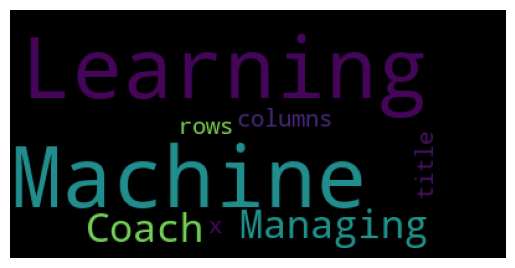

In [118]:
wordcloud1 = WordCloud().generate(str(texto1))
# Generate plot
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

In [122]:
campo_2 = ['title']

texto2 = pd.read_csv('UdemyFinal.csv', usecols=campo_2)

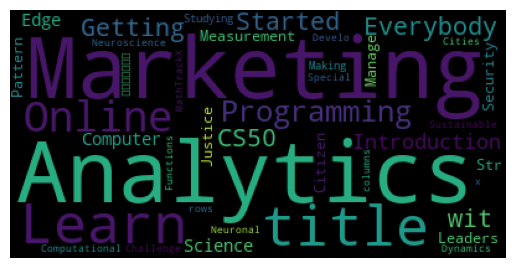

In [123]:
wordcloud1 = WordCloud().generate(str(texto2))
# Generate plot
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

In [120]:
campo_3 = ['title']

texto2 = pd.read_csv('EdxFinal.csv', usecols=campo_3)

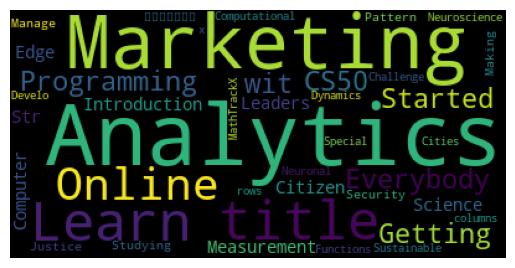

In [121]:
wordcloud1 = WordCloud().generate(str(texto2))
# Generate plot
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()